In [1]:
# From here: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
import numpy as np
import copy

import src.mcmc as mcmc
import src.utils as utils
from src.ansatz import RBM
from src.model import Model
from config_parser import get_config_file

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
visible_layer_size = 3
hidden_layer_size = 20
seed = 44  # Seed for random number generator
walker_steps = 1000
off_diag_size = 1



In [4]:
np.random.seed(seed)

b = utils.random_complex_array(visible_layer_size)  # Visible layer bias
c = utils.random_complex_array(hidden_layer_size)  # Hidden layer bias
W = utils.random_complex_matrix(visible_layer_size, hidden_layer_size)  # Visible - hidden weights
H_full = utils.random_hamiltonian(2**visible_layer_size)  # Hamiltonian
walker_full = mcmc.Walker(steps=walker_steps)
rbm_full = RBM(visible_bias=b, hidden_bias=c, weights=W)  # Initializing RBM currently with random configuration and parameters
model_full = Model(rbm_full, walker_full, H_full)  # Initializing model with RBM and Hamiltonian

In [5]:
H_sparse = utils.random_diagonal_hamiltonian(2*visible_layer_size, off_diag_size)
walker_sparse = mcmc.Walker(steps=walker_steps)
rbm_sparse = RBM(visible_bias=b, hidden_bias=c, weights=W)
model_sparse = Model(rbm_sparse, walker_sparse, H_sparse)

In [6]:
# Training models

termination_condition = 1e-5
gradient_steps = 200
learning_rate = 0.05

In [7]:
fd_plot_sparse_list = model_sparse.gradient_descent(gradient_method='finite_difference', 
                                              exact_dist=True, n_steps=gradient_steps, 
                                              learning_rate=learning_rate, 
                                              termination_condition=termination_condition)

Gradient descent step 1, energy: 0.22264395263189432
Gradient descent step 2, energy: 0.17634569732667335
Gradient descent step 3, energy: 0.14082429495360055
Gradient descent step 4, energy: 0.07391294156733677
Gradient descent step 5, energy: 0.017699668333644586
Gradient descent step 6, energy: 0.003101714969263178
Gradient descent step 7, energy: 0.0006200954880234249
Gradient descent step 8, energy: 0.00015021971374284696
Gradient descent step 9, energy: 4.326321071958924e-05
Gradient descent step 10, energy: 1.4443986483369456e-05
Gradient descent step 11, energy: 5.469982929800571e-06
Termination condition reached


In [8]:
fd_plot_full_list = model_full.gradient_descent(gradient_method='finite_difference', 
                                              exact_dist=True, n_steps=gradient_steps, 
                                              learning_rate=learning_rate, 
                                              termination_condition=termination_condition)

Gradient descent step 1, energy: -2.8580697946771534
Gradient descent step 2, energy: -3.1406062864338176
Gradient descent step 3, energy: -3.2231059380309004
Gradient descent step 4, energy: -3.2536993062053687
Gradient descent step 5, energy: -3.2661227531770645
Gradient descent step 6, energy: -3.2714333474128305
Gradient descent step 7, energy: -3.273793598128948
Gradient descent step 8, energy: -3.274892980127821
Gradient descent step 9, energy: -3.275432288251622
Gradient descent step 10, energy: -3.275704745173026
Gradient descent step 11, energy: -3.2758383648415896
Gradient descent step 12, energy: -3.275894833702379
Gradient descent step 13, energy: -3.2759077788758266
Gradient descent step 14, energy: -3.275897256904988
Gradient descent step 15, energy: -3.2758756642176756
Gradient descent step 16, energy: -3.2758506352608294
Gradient descent step 17, energy: -3.275826757068776
Gradient descent step 18, energy: -3.2758066853134795
Gradient descent step 19, energy: -3.2757918

In [9]:
print(f"Sparse Hamiltonian time: {model_sparse.optimizing_time}")
print(f"Full Hamiltonian time: {model_full.optimizing_time}")

Sparse Hamiltonian time: 10.757686376571655
Full Hamiltonian time: 50.79726576805115


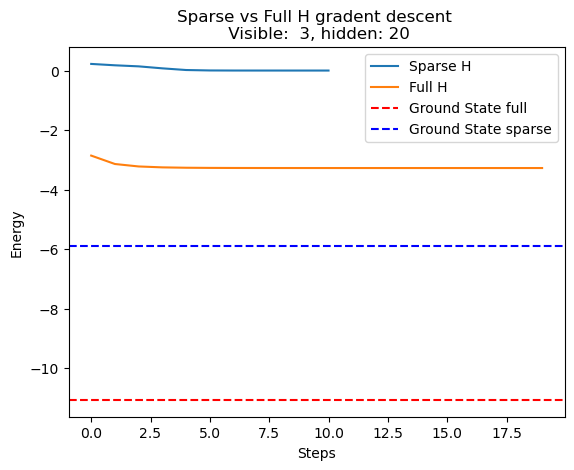

In [10]:
plt.plot(np.real(fd_plot_sparse_list), label='Sparse H')
plt.plot(np.real(fd_plot_full_list), label='Full H')


plt.axhline(y=min(np.linalg.eigvalsh(H_full)), color='red', linestyle='--', label='Ground State full')
plt.axhline(y=min(np.linalg.eigvalsh(H_sparse)), color='blue', linestyle='--', label='Ground State sparse')
plt.title(f"Sparse vs Full H gradent descent \n Visible:  {visible_layer_size}, hidden: {hidden_layer_size}")
plt.xlabel('Steps')
plt.ylabel('Energy')
plt.legend()
